# 训练自己的 YOLOv3 检测器
现在免费创建自己的自定义对象检测器了，适用于各种物体检测


下来可能会有点麻烦

为了创建自定义YOLOv3检测器，需要以下内容：

*   自己的带标签的数据集
*   配置自己的 .cfg 文件
*   obj.data 和 obj.names 文件
*   train.txt 文件，测试集可选





喜欢可以关注我的公众号，就是很少谈技术😁：


---

#**薛定谔的放纵**



# 第一步: 个人的数据集
为了创建自定义对象检测器，我们要一个数据集，以便可以有效地训练检测器以检测对象。

这可以通过两种方式完成， Google图片或用lambeling创建自己的数据集。


***在这我用的数据集上传的时候是obj.zip***

***我将在本视频或者接下来的视频种说明数据集格式***

### 1: 用谷歌的数据集
[数据集连接点这里!](https://storage.googleapis.com/openimages/web/index.html)




## 2：自己造，这个用到lambel，关于数据集怎么制作，可以参考其他教程，我后续也琢磨一下推出

# 第二步：把数据集放入drive

把数据集打包成obj.zip文件，上传至drive
现在我们可以把drive当作我们虚拟机的硬盘

 **毕竟上传速度……** 挺好！

上传之后解压缩

In [0]:
# zip在哪
!ls /mydrive/yolov3

backup	generate_train.py  obj.data  obj.names	obj.zip  yolov3_custom2.cfg


In [0]:
# 搞到根目录
!cp /mydrive/yolov3/obj.zip ../

In [0]:
# 解压缩
!unzip ../obj.zip -d data/obj

Archive:  ../obj.zip
 extracting: data/obj/aircraft_100.jpg  
 extracting: data/obj/aircraft_100.txt  
 extracting: data/obj/aircraft_101.jpg  
 extracting: data/obj/aircraft_101.txt  
 extracting: data/obj/aircraft_102.jpg  
 extracting: data/obj/aircraft_102.txt  
 extracting: data/obj/aircraft_104.jpg  
 extracting: data/obj/aircraft_104.txt  
 extracting: data/obj/aircraft_105.jpg  
 extracting: data/obj/aircraft_105.txt  
 extracting: data/obj/aircraft_107.jpg  
 extracting: data/obj/aircraft_107.txt  
 extracting: data/obj/aircraft_110.jpg  
 extracting: data/obj/aircraft_110.txt  
 extracting: data/obj/aircraft_114.jpg  
 extracting: data/obj/aircraft_114.txt  
 extracting: data/obj/aircraft_116.jpg  
 extracting: data/obj/aircraft_116.txt  
 extracting: data/obj/aircraft_119.jpg  
 extracting: data/obj/aircraft_119.txt  
 extracting: data/obj/aircraft_120.jpg  
 extracting: data/obj/aircraft_120.txt  
 extracting: data/obj/aircraft_123.jpg  
 extracting: data/obj/aircraft_123.t

# 第三步: 更改配置文件
这一步我们需要更改 
**.cfg file, obj.data, obj.names， train.txt** 文件

这一部分我们先设置，下一次视频可单独拿出来讲



## i) 编辑cfg文件


In [0]:
# 下载到drive并重命名
!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom2.cfg

In [0]:
# 下载到本地
download('cfg/yolov3.cfg')

编辑.cfg 问件，打开方式可选
 **Text Editor** 


**batch = 64** 
**subdivisions = 16** 

有错改32

接下来的取决于类别

**max_batches = 2000**, **steps = 1600, 1800**,
I changed the **classes = 5** in the three YOLO layers and **filters = 30** in the three convolutional layers before the YOLO layers. 

**Optional:** In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [0]:
# 把文件放回去，从drive上传
!cp /mydrive/yolov3/yolov3_custom2.cfg ./cfg

# 从本地上传
#%cd cfg
#upload()
#%cd .. 

## ii) obj.names 和 obj.data 
创建一个新文件 **obj.names** 把数据集里面的类写进去



创建新文件 **obj.data** 并且对其进行修改,写入下列信息

classes = 5

train = data/train.txt

valid = data/test.txt

names = data/obj.names

backup = /mydrive/yolov3/backup/


backup是我们在整个训练中将权重保存的地方，以免权重信息丢失。 在drive中创建一个backup**注意路径**





In [0]:
# 从drive上传obj.names 和 obj.data 
!cp /mydrive/yolov3/obj.data  ./data

# 从本地上传
#%cd data
#upload()
#%cd .. 

## iii) 创建 train.txt
从github下载.py文件
 [Github连接](https://github.com/theAIGuysCode/YoloGenerateTrainingFile/blob/master/generate_train.py/)

同样的传上去

In [0]:
# 从云端上传
!cp /mydrive/yolov3/generate_train.py ./

# 本地上传

#upload()


运行生成一下


In [0]:
!python generate_train.py

In [0]:
#看看darknet/data目录下有没有train.txt，可以双击查看
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


其实里面是训练图片的路径

# 第四步: 下载卷积层权重
这已经很好了，直接使用，加快速度

In [0]:
# 下载卷积层
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-03-23 02:15:54--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   417KB/s    in 7m 36s  

2020-03-23 02:23:32 (348 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# 第五步: Train 吧！
最后一步

```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```
长时间误操作谷歌会自动断开连接

咋办呢？打开控制台！
 (CTRL + SHIFT + i) 

输入下列字符  **回车**
```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```
自动模拟点击 10 min一次

In [0]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg darknet53.conv.74 -dont_show

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

每100次迭代保存一次，  **yolov3_custom_last.weights** 保存在 **mydrive/yolov3/backup/** 

如果重新开始训练，我们重新载入权重！

```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show
```

In [0]:
!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov3/backup/yolov3_custom2_last.weights -dont_show

 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom2
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
 

# 第六步: 用起来！

训练好了之后我们就可以用来检测了！

In [0]:
# 设置配置文件
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom2.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom2.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64

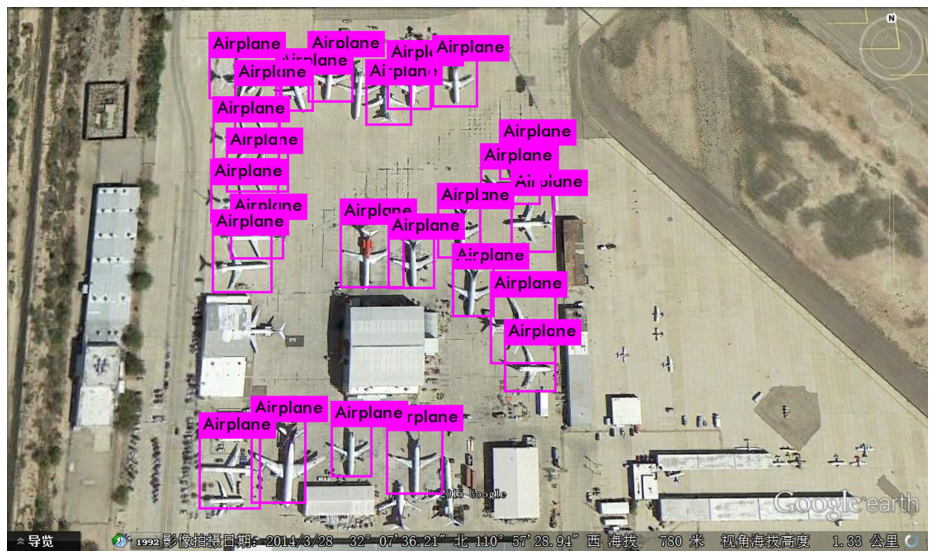

In [0]:
# 运行就好，从本地或者云端
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolov3/backup/yolov3_custom2_last.weights /mydrive/images/aircraft_283.jpg -thresh 0.3
imShow('predictions.jpg')

# 谢谢！
如果这对你有用，请点击关注！点赞！分享！转发！支持！

[阿黎好帅](https://space.bilibili.com/410236062)

In [0]:
# OK!Game Over！
download('predictions.jpg')